In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [38]:
print(tf.__version__)

2.0.0-rc0


In [172]:
mnist=keras.datasets.fashion_mnist

In [173]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [174]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [175]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [177]:
np.where(X_train>200)

(array([    0,     0,     0, ..., 59999, 59999, 59999], dtype=int64),
 array([ 5,  6,  6, ..., 18, 18, 18], dtype=int64),
 array([15, 15, 16, ...,  5, 11, 21], dtype=int64))

In [178]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [179]:
X_train[0].shape

(28, 28)

In [180]:
y_train[0]

9

In [181]:
np.max(X_train)

255

In [182]:
np.mean(X_train)

72.94035223214286

In [183]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [184]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

> # Data Exploration

In [185]:
X_test.shape

(10000, 28, 28)

In [186]:
y_test.shape

(10000,)

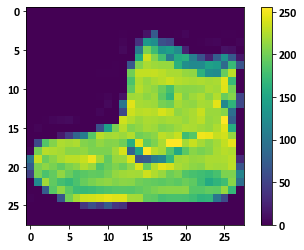

In [187]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()  # - values is under 0-255,since neural n/w model doesnot take value > 1, we normalize it.

In [188]:
y_train[0] # class 9 - which is a Ankle Boot

9

In [189]:
X_train=X_train/255.0
X_test=X_test/255.0

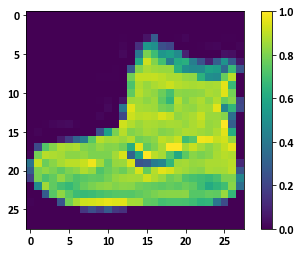

In [190]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()  # - values is under 0-255,since neural n/w model doesnot take value > 1, we normalize it.

# Model Building with TF 2.0

In [191]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [192]:
model=Sequential()

In [193]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))# multiclass classification.

In [194]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Compilation
- Loss Function 
- Optimizer
- Metrics

In [195]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [196]:
history = model.fit(X_train,y_train,epochs=10,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 374us/sample - loss: 0.4988 - accuracy: 0.8221 - val_loss: 0.4225 - val_accuracy: 0.8464
Epoch 2/10
48000/48000 [==============================] - 16s 333us/sample - loss: 0.3781 - accuracy: 0.8616 - val_loss: 0.4527 - val_accuracy: 0.8361
Epoch 3/10
48000/48000 [==============================] - 21s 437us/sample - loss: 0.3377 - accuracy: 0.8752 - val_loss: 0.3439 - val_accuracy: 0.8737
Epoch 4/10
48000/48000 [==============================] - 23s 475us/sample - loss: 0.3139 - accuracy: 0.8829 - val_loss: 0.3530 - val_accuracy: 0.8723
Epoch 5/10
48000/48000 [==============================] - 17s 364us/sample - loss: 0.2992 - accuracy: 0.8899 - val_loss: 0.3441 - val_accuracy: 0.8764
Epoch 6/10
48000/48000 [==============================] - 16s 326us/sample - loss: 0.2830 - accuracy: 0.8941 - val_loss: 0.3266 - val_accuracy: 0.8826
Epoch 7/10
48000/48000 [====================

In [197]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc*100)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

87.91000247001648


In [198]:
from sklearn.metrics import accuracy_score
y_pred=model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

0.8791

In [199]:
pred=model.predict(X_test)

In [200]:
np.argmax(pred[0]) #class 9

9

 # Plotting Learning Curve and Confusion Matrix in Tensorflow 2.0

> - Learning curve is plot for accuracy and loss during training and validation.

In [201]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [202]:
history.history

{'loss': [0.49875320758340724,
  0.37805567062290113,
  0.337737225475333,
  0.3139377896914569,
  0.2992266791665558,
  0.28295517670139814,
  0.2700421453014739,
  0.25904951067042326,
  0.25132927124597093,
  0.24326813698143876],
 'accuracy': [0.8221458,
  0.8616458,
  0.8752083,
  0.882875,
  0.88989586,
  0.89414585,
  0.89814585,
  0.9046875,
  0.90577084,
  0.90925],
 'val_loss': [0.4224519730700801,
  0.452741372899715,
  0.34391496402987587,
  0.352973455581232,
  0.3441060526438135,
  0.32662695959734267,
  0.32625841956207297,
  0.3445749847800956,
  0.34916380463847113,
  0.33053414386789276],
 'val_accuracy': [0.84641665,
  0.83608335,
  0.87366664,
  0.87225,
  0.8764167,
  0.8825833,
  0.88491666,
  0.8774167,
  0.8793333,
  0.8854167]}

In [203]:
import matplotlib.pyplot as plt

In [204]:
history.history['loss']

[0.49875320758340724,
 0.37805567062290113,
 0.337737225475333,
 0.3139377896914569,
 0.2992266791665558,
 0.28295517670139814,
 0.2700421453014739,
 0.25904951067042326,
 0.25132927124597093,
 0.24326813698143876]

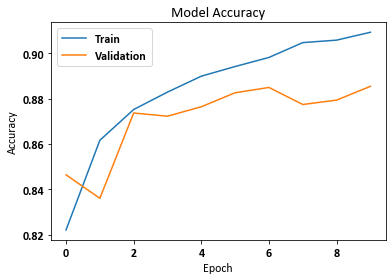

In [205]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

> ### From the above and below graph, you can see that, the training accuracy is increasing but the validation accuracy is not upto the mark, so that means there is overfitting of the data.

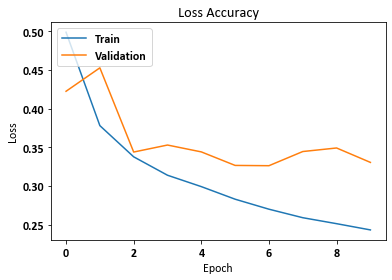

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Text(0, 0.5, 'Loss')

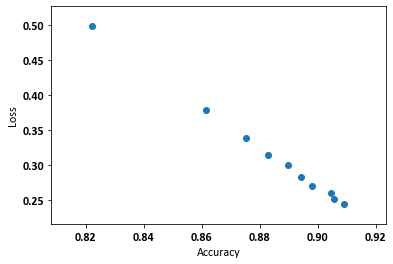

In [207]:
plt.scatter(history.history['accuracy'],history.history['loss'])
plt.xlabel('Accuracy')
plt.ylabel('Loss')

### Plot Confusion Matrix

In [208]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17439ff0848>)

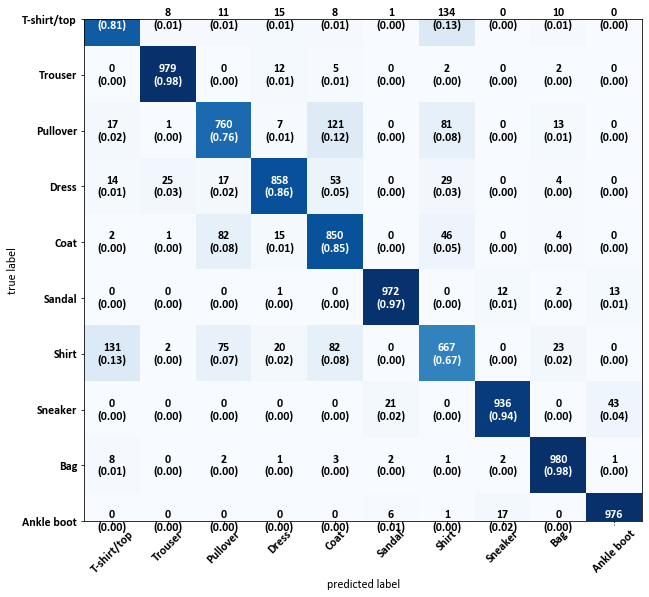

In [209]:
font={
    'family':'Calibri',
    #'weight':'bold',
    'size':12
}
import matplotlib
matplotlib.rc('font',**font)
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(10,10),class_names=classes,show_normed=True)

In [212]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

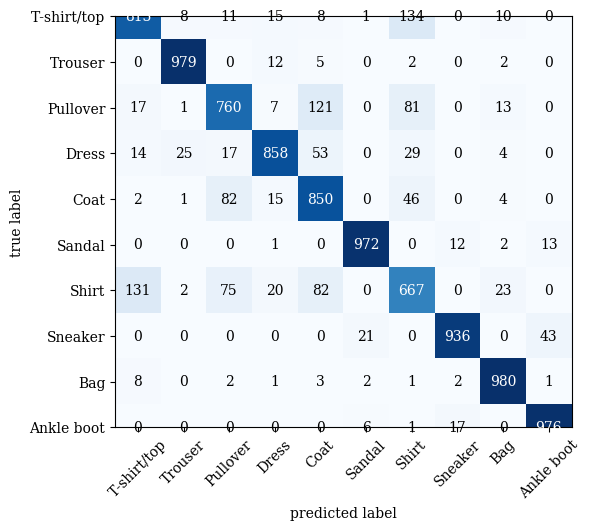

In [219]:
plt.rc('font',family='Serif')
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(6,6),class_names=classes,show_normed=False)
plt.tight_layout()
fig.savefig('cm.png')

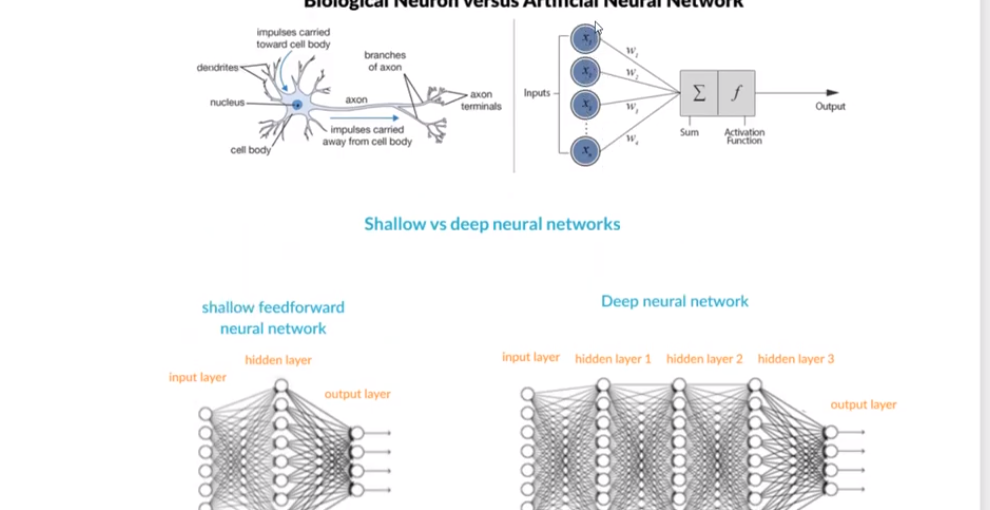

#  CHURN MODELLING USING ANN

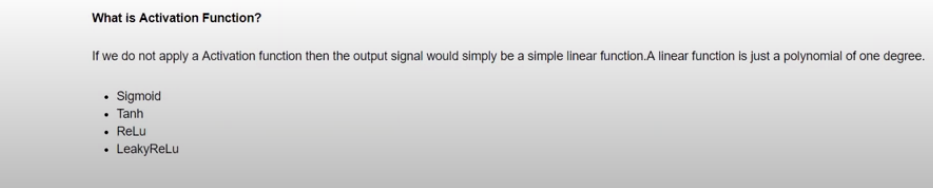

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [7]:
dataset=pd.read_csv('churn_modelling.csv')

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
y=dataset['Exited']

In [10]:
X=dataset.drop(columns=['CustomerId','Surname','RowNumber','Exited'],axis=1)

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
X['Geography']=label1.fit_transform(X['Geography'])

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
X['Gender']=label1.fit_transform(X['Gender'])

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [16]:
X=pd.get_dummies(X,drop_first=True,columns=['Geography'])

> - That was a categorical data in Georgraphy and Gender, so we did One-Hot Encoding for the data.

In [17]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


> - See the balance columns, the values are varying very widely, so we have to scale the data.

## Feature Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [20]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [21]:
X_train

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

In [22]:
X_train.shape

(8000, 11)

### Building ANN

In [24]:
model=Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))  #Input layers have activation functions for converting the model into non-linear functions.
model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid')) #sigmoid activation function for binary output.

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','mse']) #adam- stochastic gradient optimizer.

> - If batch size is 1, the weights are updates for every step, else if the batch size is 10, then the weights are updated for every 10 steps.

> - If the loss is not  decreasing after the epochs, then there might be overfitting.

In [27]:
model.fit(X_train,y_train.to_numpy(),batch_size=10,epochs=10,verbose=1) # since X_train is numpy, y_train should also be numpy.

Train on 8000 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
8000/8000 [==============================] - 6s 753us/sample - loss: 0.4511 - accuracy: 0.8148 - mse: 0.1424
Epoch 2/10
8000/8000 [==============================] - 3s 363us/sample - loss: 0.3990 - accuracy: 0.8354 - mse: 0.1238
Epoch 3/10
8000/8000 [==============================] - 3s 332us/sample - loss: 0.3718 - accuracy: 0.8451 - mse: 0.1141
Epoch 4/10
8000/8000 [==============================] - 3s 346us/sample - loss: 0.3537 - accuracy: 0.8525 - mse: 0.1079
Epoch 5/10
8000/8000 [==============================] - 3s 364us/sample - loss: 0.3480 - accuracy: 0.8571 - mse: 0.1060
Epoch 6/10
8000/8000 [==============================] - 3s 392us/sample - loss: 0.3440 - accuracy: 0.8576 - mse: 0.1052
Epoch 7/10
8000/8000 [==============================] - 3s 334us/sample - loss: 0.3416 - accuracy: 0.8576 - mse: 0.1042
Epoch 8/10
8000/8000 [======================

In [28]:
y_pred=model.predict_classes(X_test)

In [29]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [30]:
y_test

1344    1
8167    0
4747    0
5004    1
3124    1
       ..
9107    0
8249    0
8337    0
6279    1
412     0
Name: Exited, Length: 2000, dtype: int64

In [32]:
model.evaluate(X_test,y_test.to_numpy())

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34077607560157774, 0.8585, 0.10446361]

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [34]:
confusion_matrix(y_test,y_pred)

array([[1537,   56],
       [ 227,  180]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.8585